## Fig 3(a)

In [1]:
# let's import all of the packages that we will need in the notebook

import scanpy as sc
import numpy as np
from scipy.sparse import find
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
import multiprocessing
import pandas as pd

from scipy.stats import gaussian_kde

import anndata as ad

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import random

import sys
sys.path.append('/dfs/user/yhr/cross-species-coarse/')
from cs_utils import plotly_scatter

import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [2]:
def new_donors(ad):
    # add donors and then filter
    ad.obs["donor_num"] = ad.obs["donor"].str.split("TSP", expand=True)[1].astype(int)
    return ad[ad.obs["donor_num"] > 15]

In [3]:
## First version of the figure
#adata = sc.read_h5ad("/dfs/scratch0/lenc/new_tabula_sapiens_umap.h5ad") #<-- tabula sapiens with precomputed umap

## 33 layer model version of the figure
adata = sc.read_h5ad("/dfs/project/cross-species/uce/new_tabula_sapiens_ep_8_sn_2013249_nlayers_33_sample_size_1024.h5ad")
#adata = sc.read_h5ad("/dfs/user/yhr/snap/UCE/new_tabula_sapiens_ep_8_sn_251656_nlayers_4_sample_size_1024_proc.h5ad")


## 4 laye rmodel
## adata = sc.read_h5ad("/dfs/user/yhr/snap/UCE/new_tabula_sapiens_ep_8_sn_251656_nlayers_4_sample_size_1024_proc.h5ad")

In [4]:
tabula_uce = sc.AnnData(adata.obsm['X_uce'])
tabula_uce.obs = adata.obs
tabula_uce = new_donors(tabula_uce)

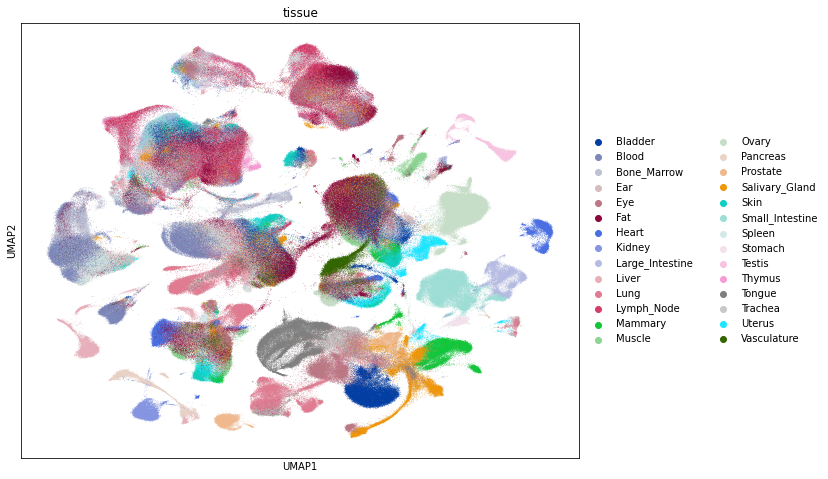

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8])
ax=plt.gca()
sc.pl.umap(adata, color='tissue', ax=ax, s=1)
universal_xlim = ax.get_xlim()
universal_ylim = ax.get_ylim()

In [6]:
## Standardize cell type names

adata.obs['cell_ontology_class'] = [x.title() for x in adata.obs['cell_ontology_class']]

mapping_dict = {x:x for x in adata.obs['cell_ontology_class'].values}
mapping_dict.update({'Type Ii Pneumocyte': 'Type II Pneumocyte'})

adata.obs['cell_ontology_class'] = pd.Categorical(adata.obs['cell_ontology_class'].map(mapping_dict))

mapping_dict = {x:x for x in adata.obs['cell_ontology_class'].values}
mapping_dict.update({x:x.replace('Cd', 'CD') for x in adata.obs['cell_ontology_class'].unique() if 'Cd' in x})

adata.obs['cell_ontology_class'] = pd.Categorical(adata.obs['cell_ontology_class'].map(mapping_dict))

In [7]:
subset_adata = tabula_uce[tabula_uce.obs['tissue']=='Lung']
sc.tl.dendrogram(subset_adata, 'cell_ontology_class')

         Falling back to preprocessing with `sc.pp.pca` and default params.


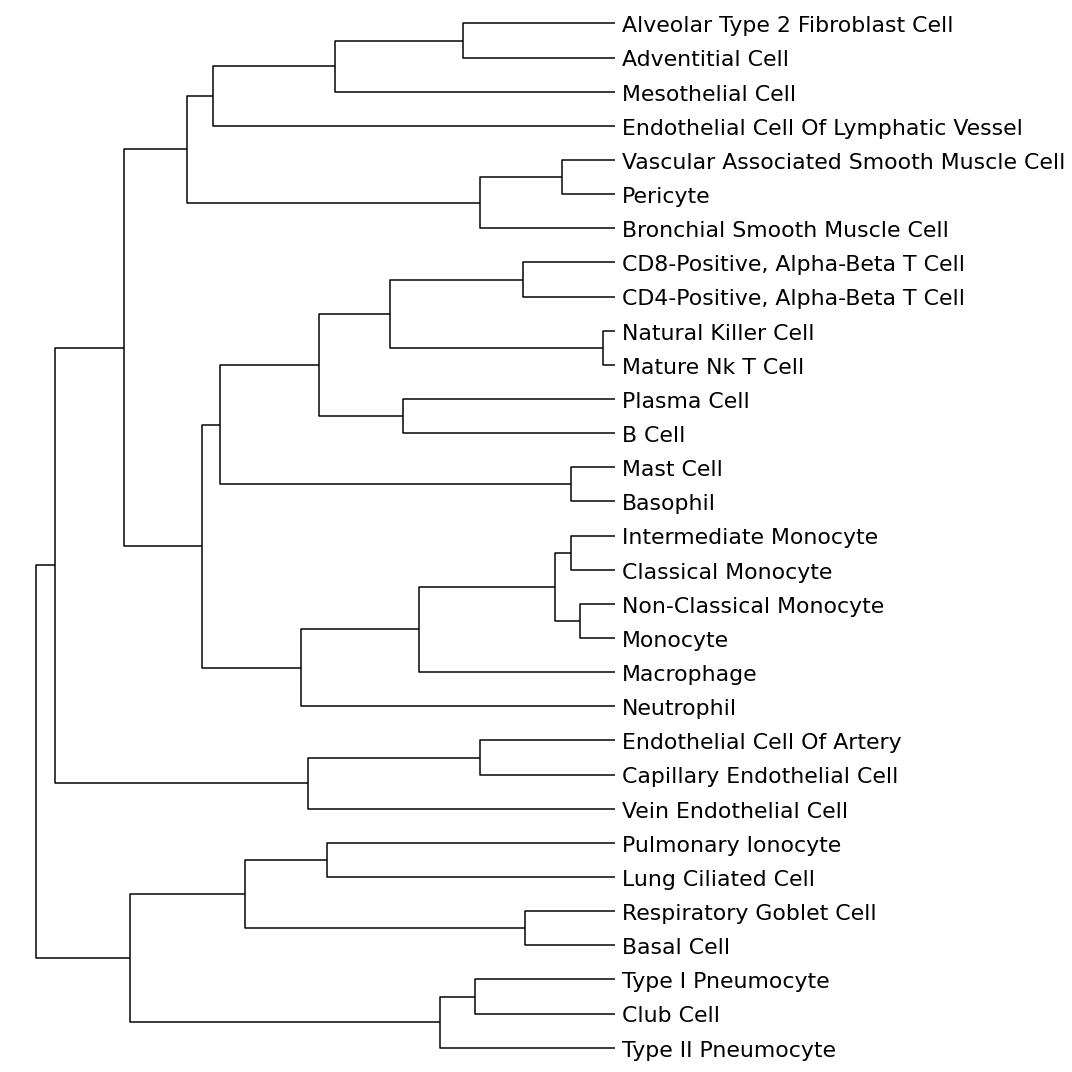

In [9]:
## Make colored denrogram
linkage_matrix = subset_adata.uns['dendrogram_cell_ontology_class']['linkage']

# Your data loading code here...
categories = subset_adata.obs['cell_ontology_class'].cat.categories

# Calculate the dendrogram
plt.figure(figsize=[15,15])
leaf_colors = lambda x: 'black'
#leaf_colors = lambda x: 'firebrick' if '_TS' in categories[x] else 'black'

dendro = dendrogram(linkage_matrix, 
                    leaf_label_func=lambda x: categories[x], 
                    color_threshold=0.0,
                    above_threshold_color='black',
                    orientation='left')  # Color for branches

# Increase font size and apply custom leaf coloring
leaf_font_size = 22  # Adjust this value to your preference
for i, d in enumerate(dendro['leaves']):
    label = plt.gca().get_yticklabels()[i]
    label.set_color(leaf_colors(d))
    label.set_fontsize(leaf_font_size)

# Remove y-axis labels and bounding box
plt.gca().get_xaxis().set_visible(False)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Ensures that all labels are displayed properly
plt.savefig('fig3a.svg')
plt.show()


### Supplementary Information

Lymph_Node


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


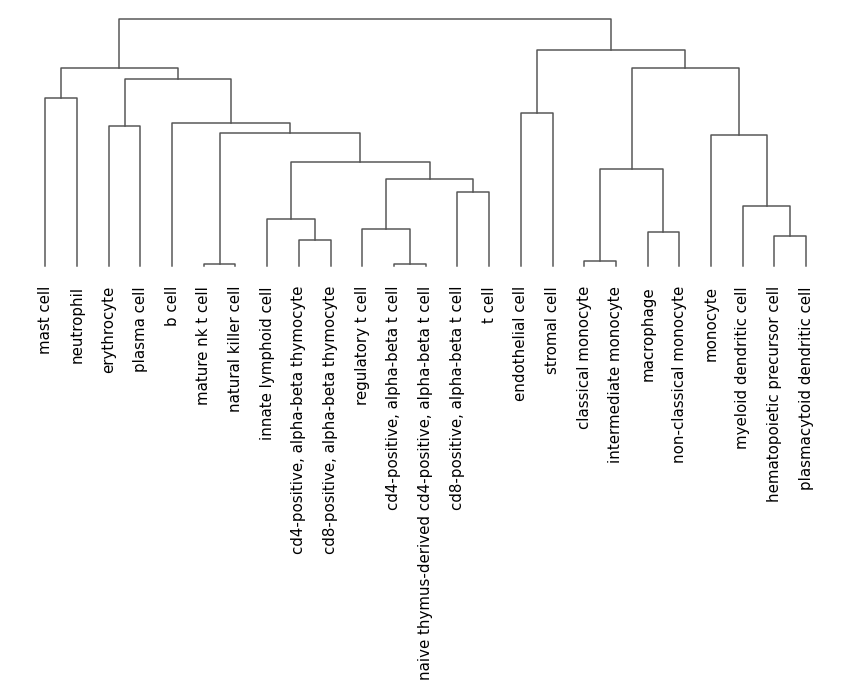

Thymus


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


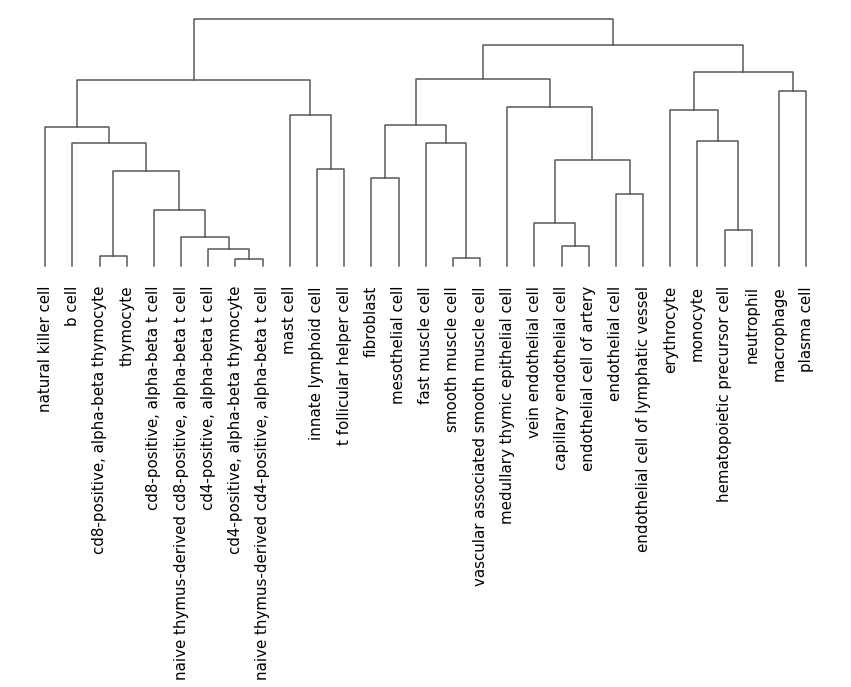

Liver


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


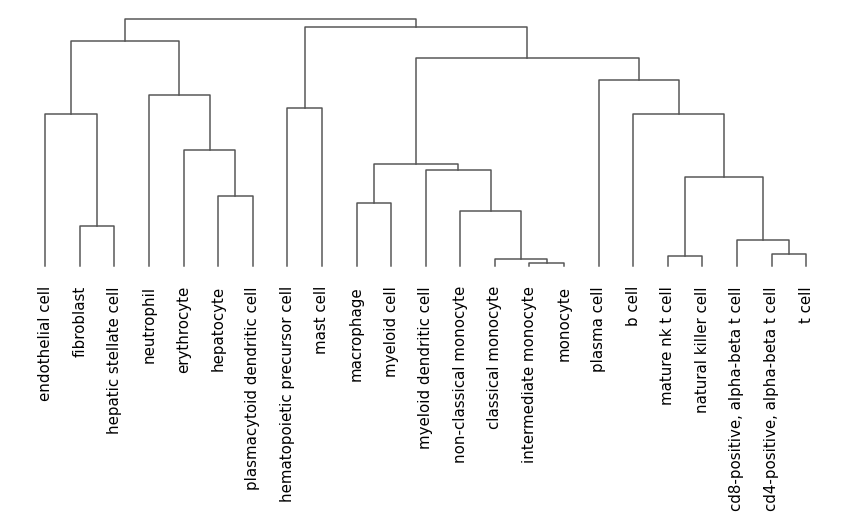

Heart


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


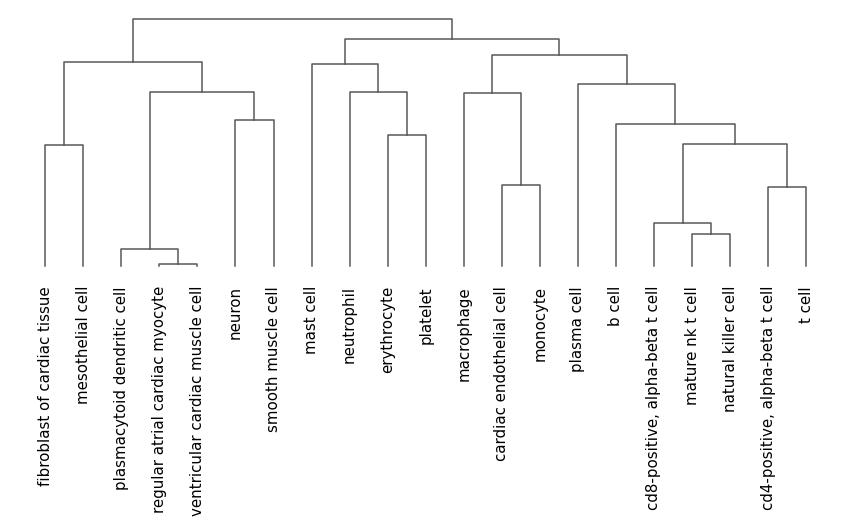

Lung


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


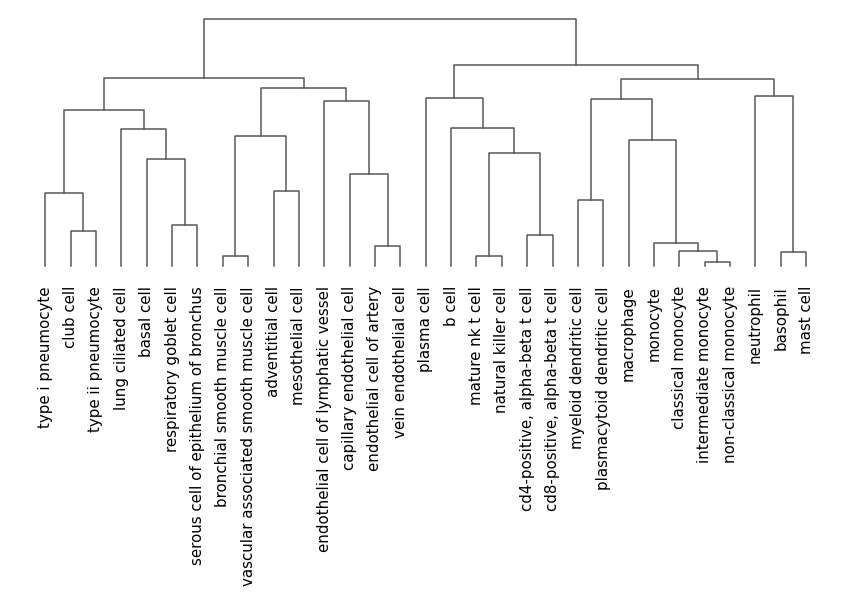

Muscle


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


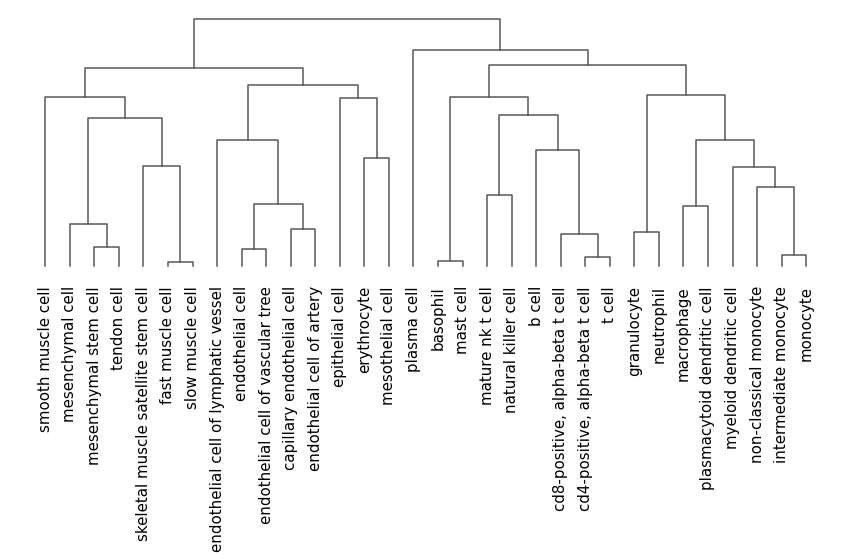

Spleen


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


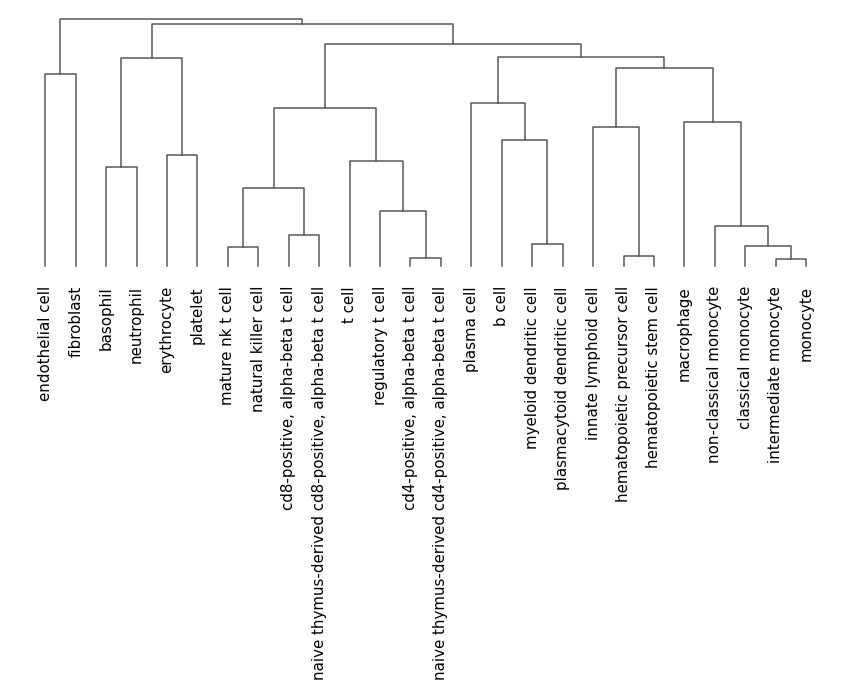

Eye


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


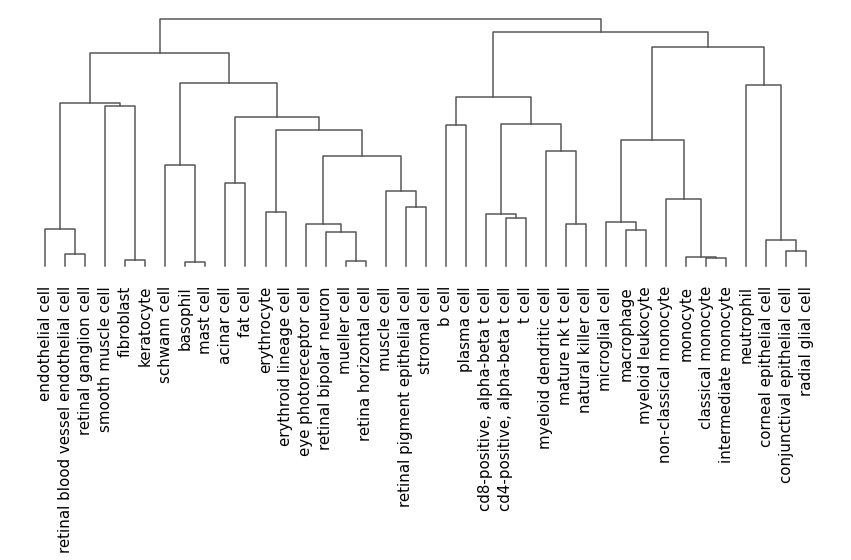

Bone_Marrow


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


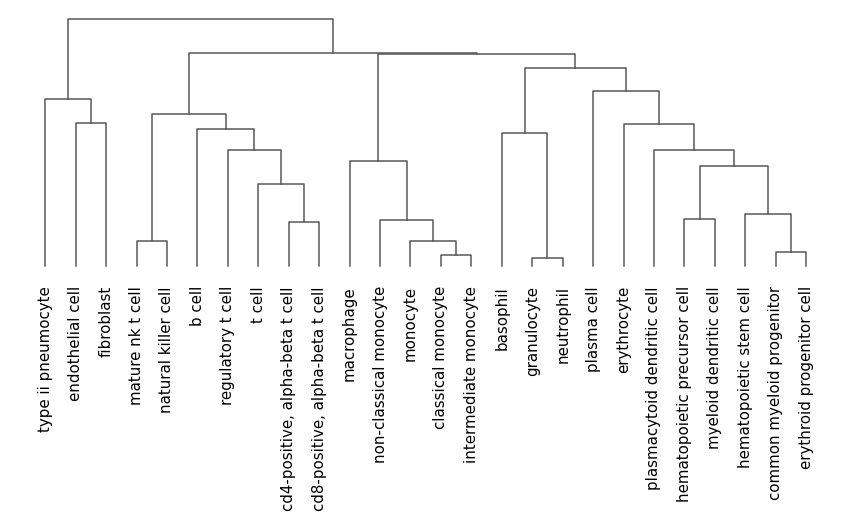

Uterus


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


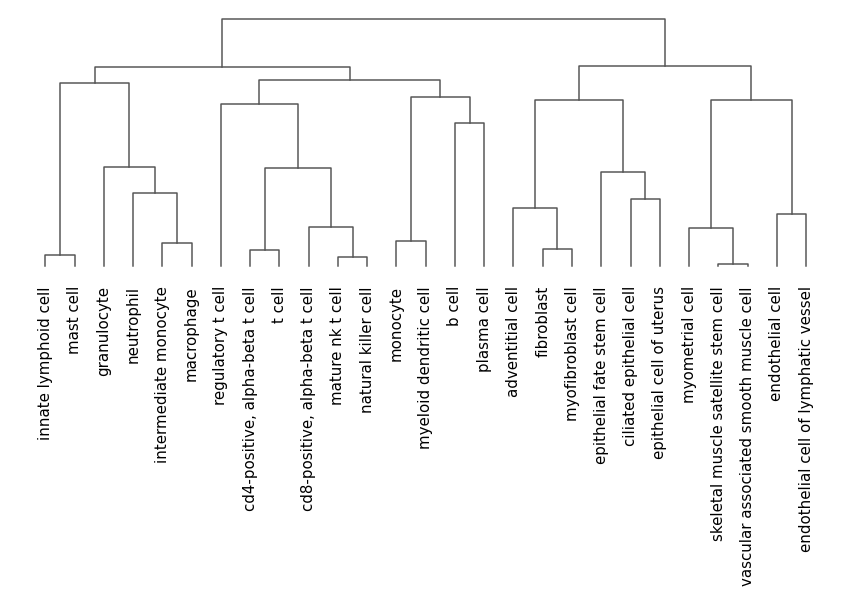

Fat


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


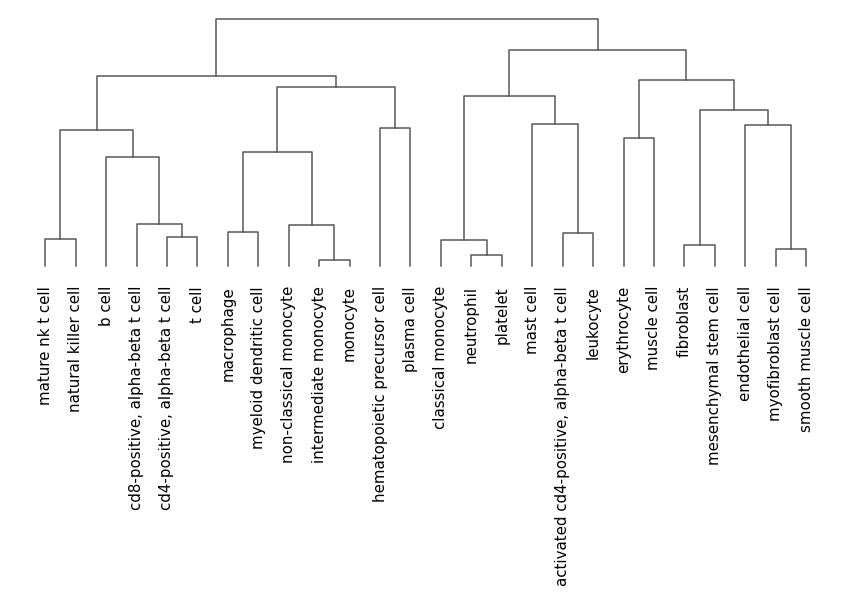

Ovary


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


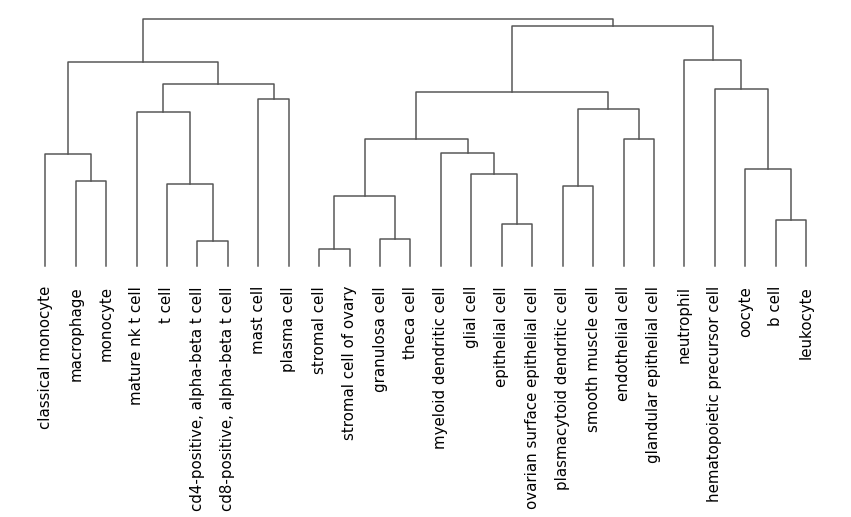

Vasculature


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


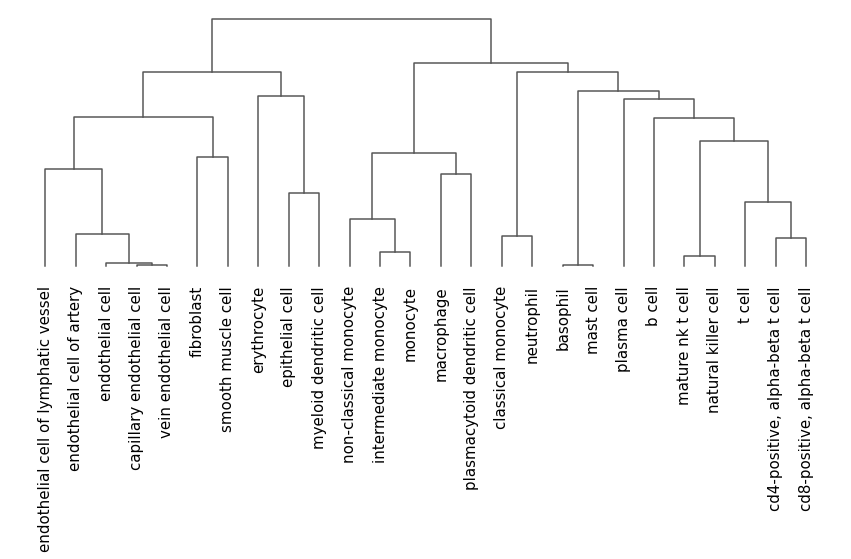

Tongue


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


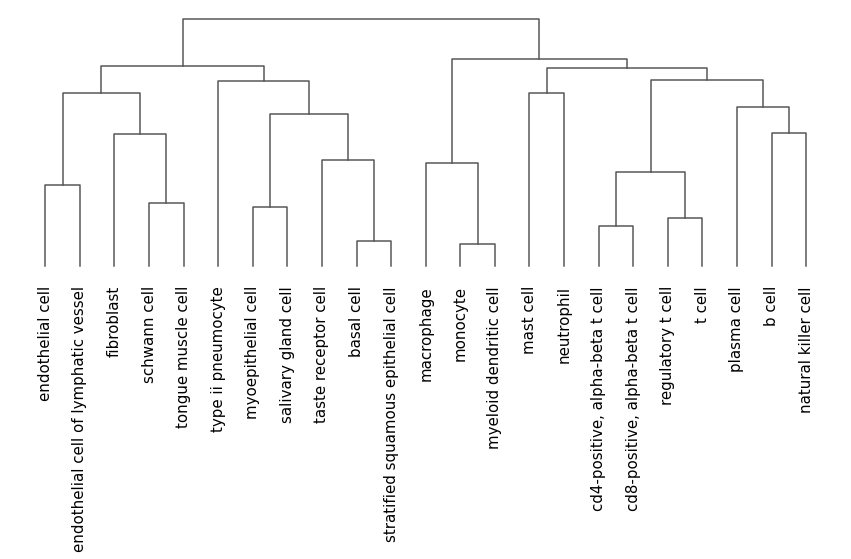

Mammary


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


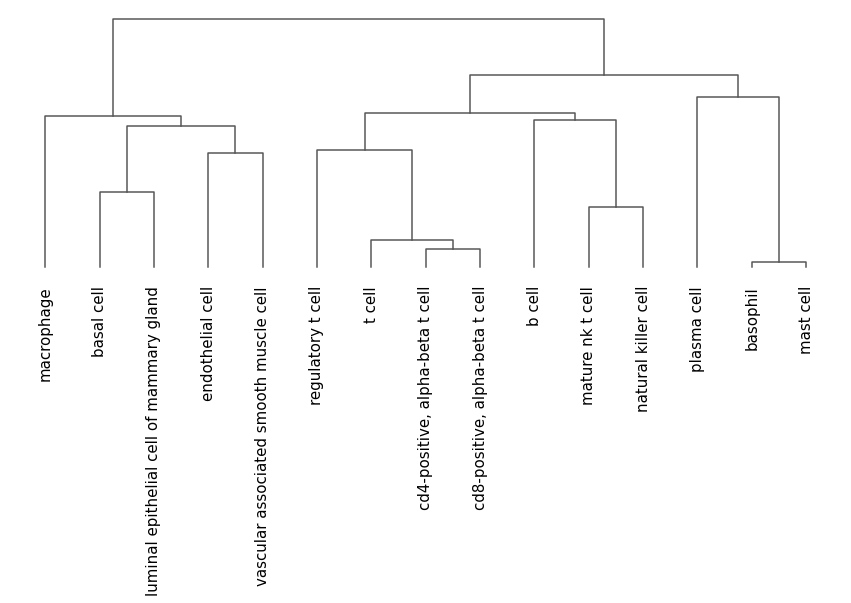

Trachea


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


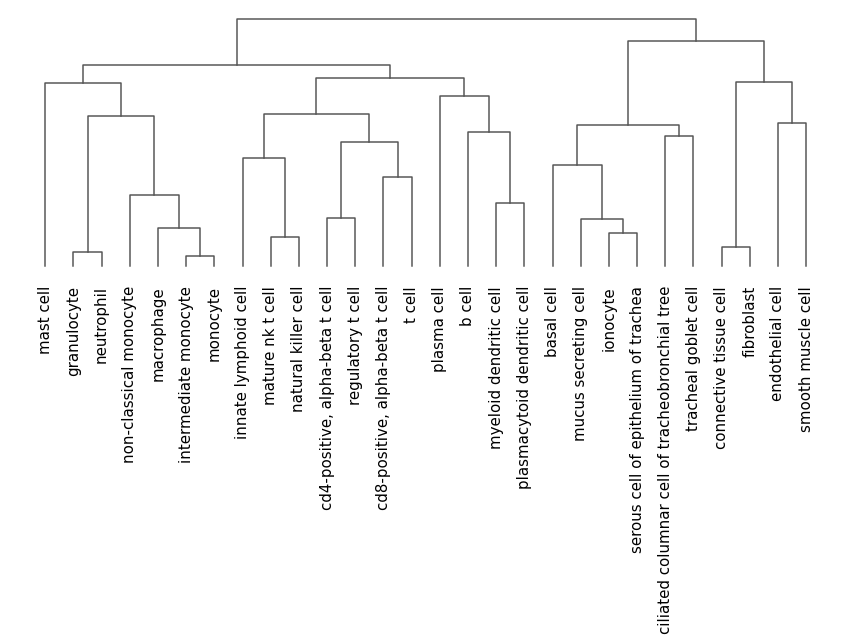

Bladder


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


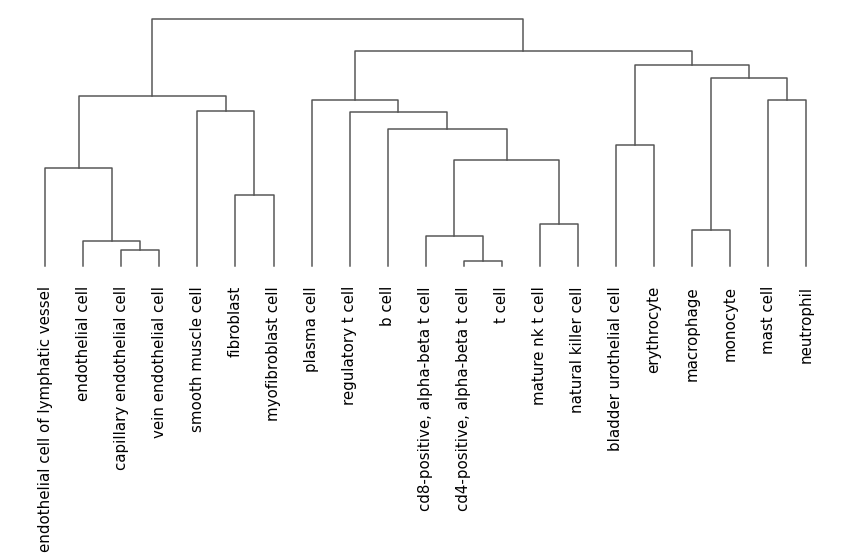

Prostate


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


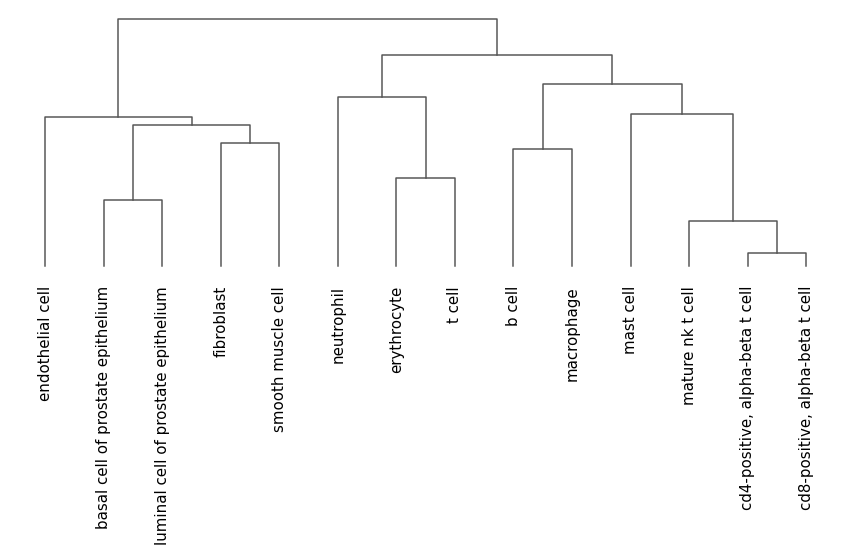

Blood


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


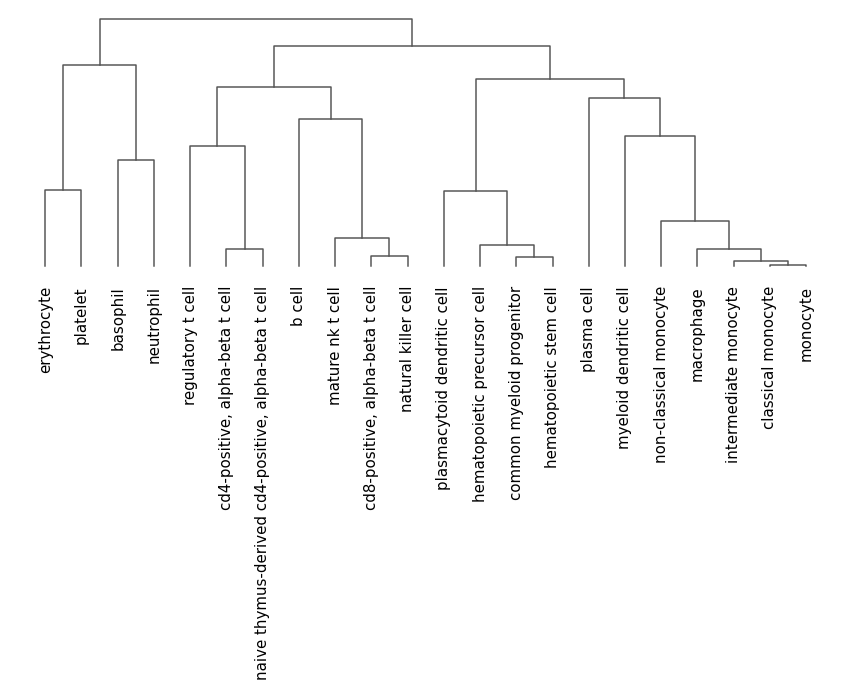

Salivary_Gland


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


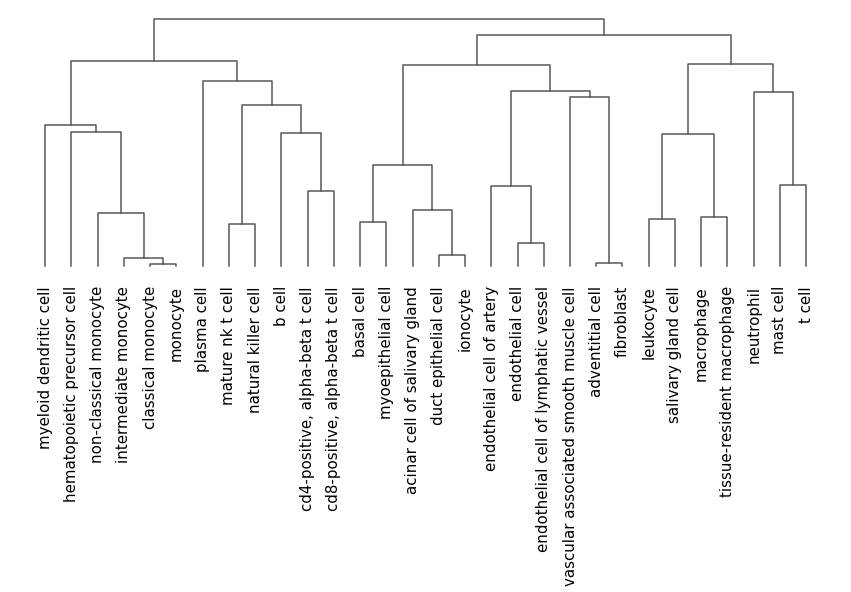

Skin


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


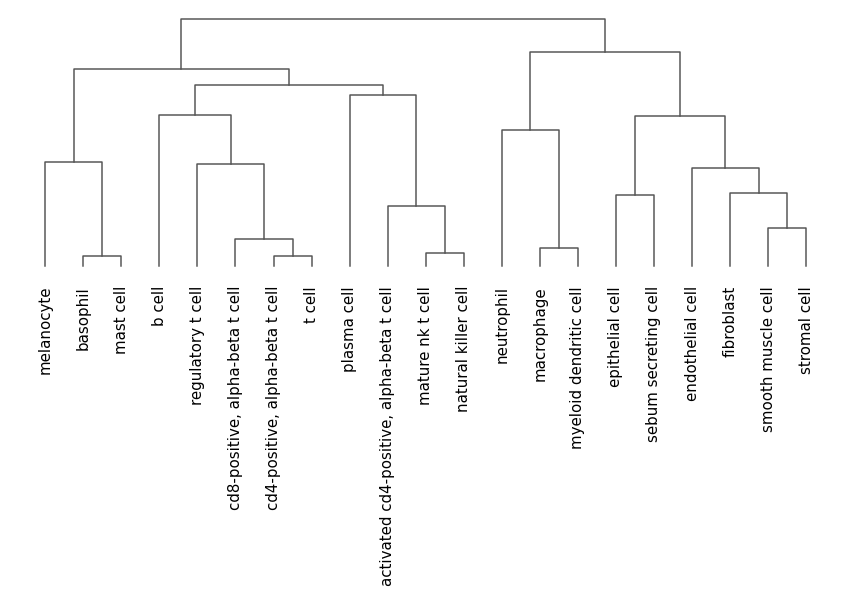

Large_Intestine


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


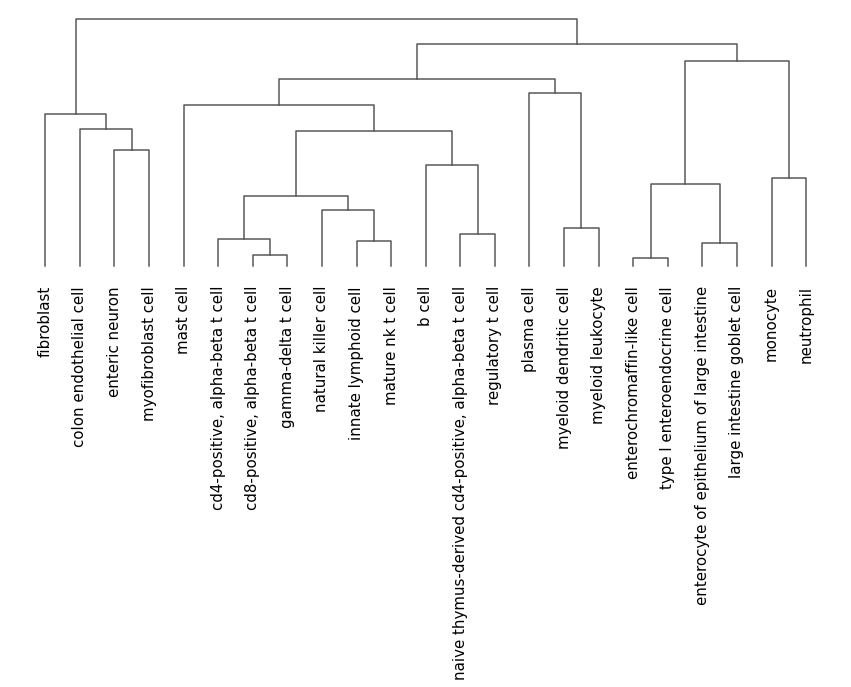

Small_Intestine


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


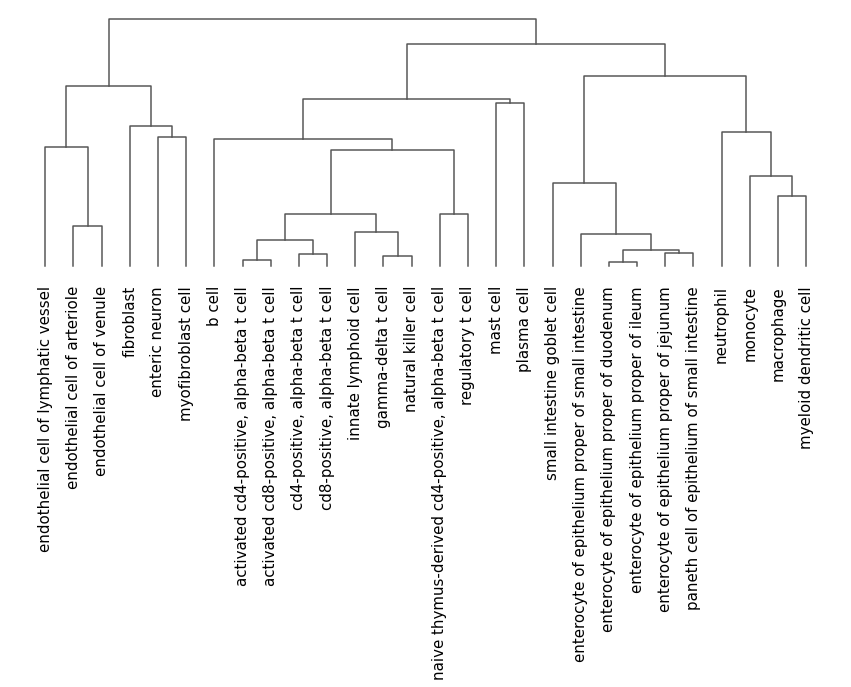

Stomach


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


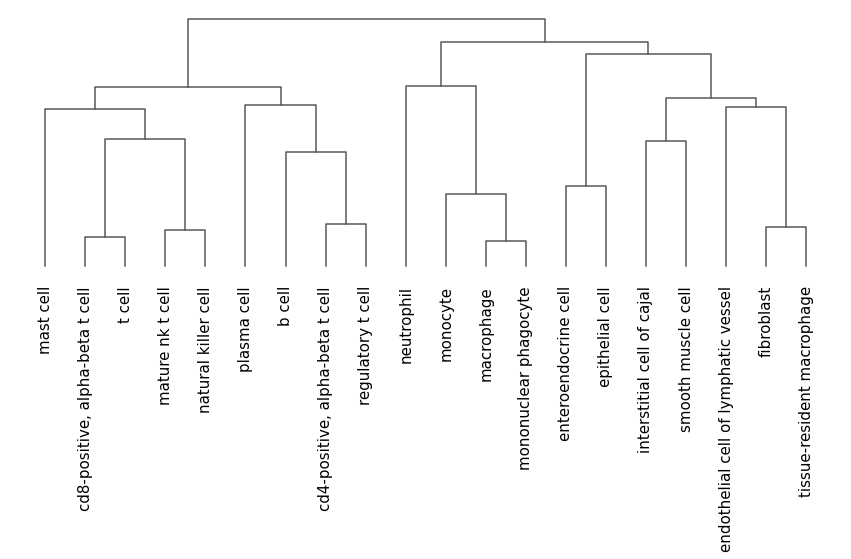

Kidney


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


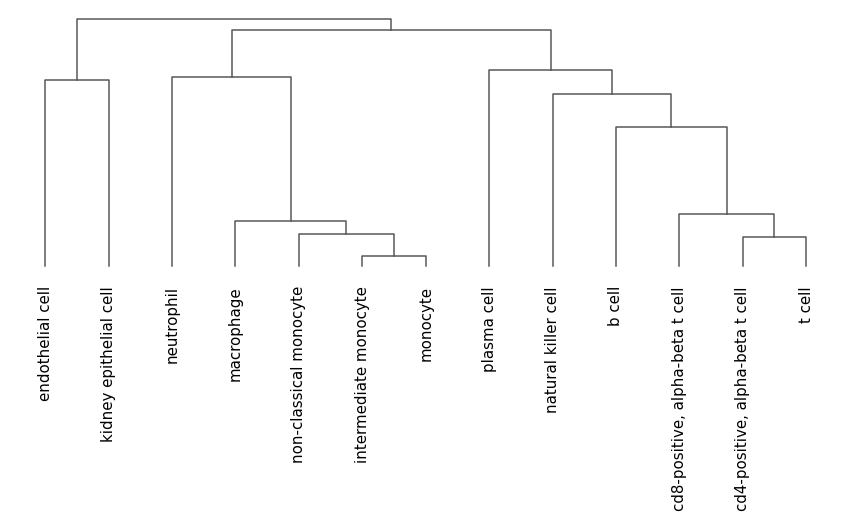

Pancreas


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


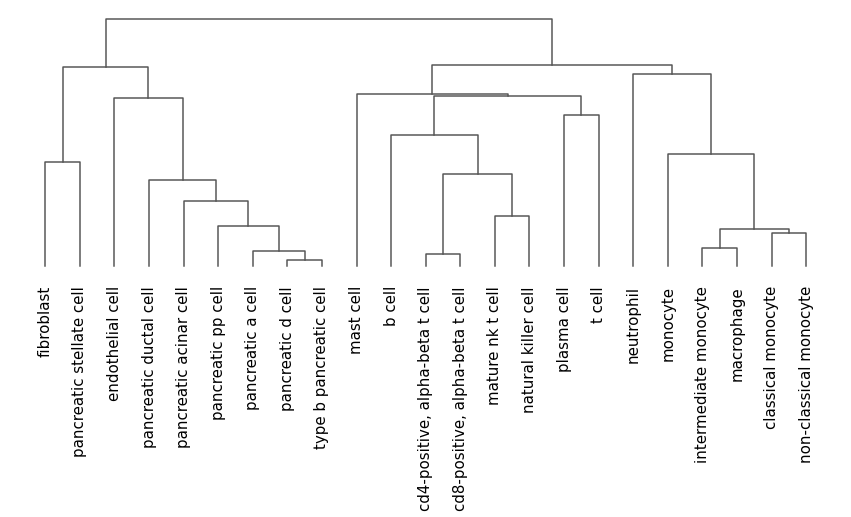

Testis


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


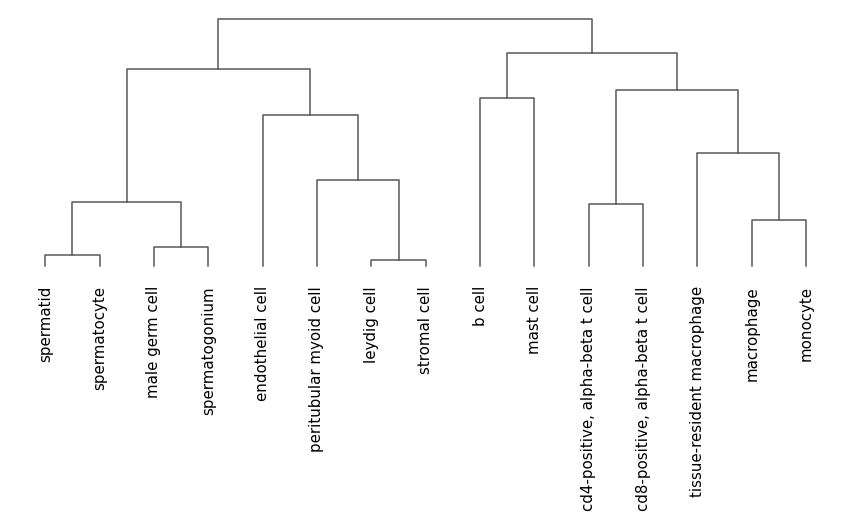

Ear


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


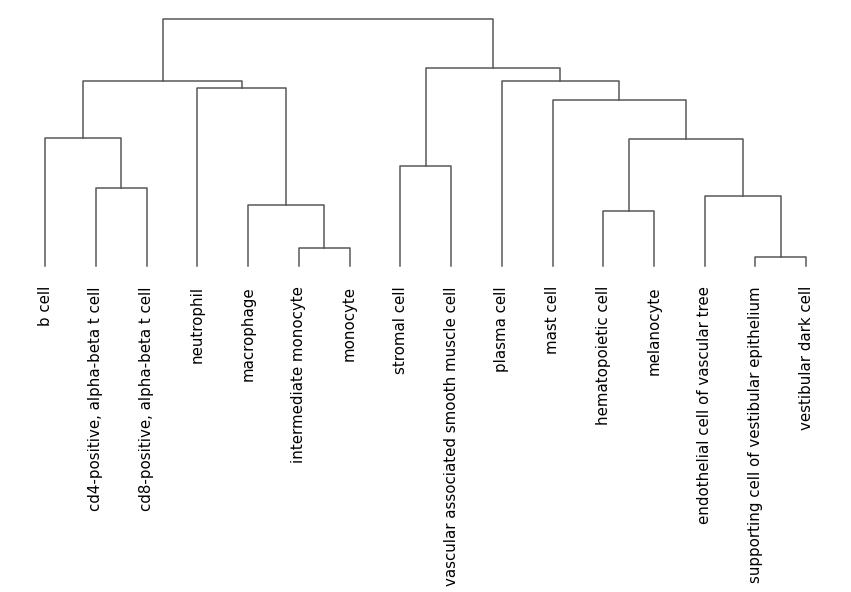

In [50]:
for x in adata.obs['tissue'].unique():
    print(x)
    subset_adata = adata[adata.obs['tissue']==x]
    sc.tl.dendrogram(subset_adata, 'cell_ontology_class')

    plt.figure(figsize=[15,5])
    ax = plt.gca()
    sc.pl.dendrogram(subset_adata, 'cell_ontology_class', ax=ax)